# About Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The "Online Retail Transaction" dataset contains information on transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located. This dataset can be used to analyze customer behavior and preferences, identify popular products, and optimize pricing and marketing strategies.

Column Descriptors
<ul>
  <li>StockCode: A code used to identify the product that was purchased</li>
  <li>Description: A brief description of the product that was purchased</li>
  <li>Quantity: The quantity of the product that was purchased</li>
  <li>InvoiceDate: The date and time that the purchase was made</li>
  <li>UnitPrice: The price of one unit of the product that was purchased</li>
  <li>CustomerID: The unique identifier for the customer who made the purchase</li>
  <li>Country: The country where the customer who made the purchase is located</li>
</ul>

# Dataset Reading & Making It More Useful

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 'large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'axes.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'figure.facecolor': 'black',
    'figure.edgecolor': 'black',
    'savefig.facecolor': 'black',
    'savefig.edgecolor': 'black',
    'text.color': 'white',
})

In [5]:
df=pd.read_csv("/content/drive/MyDrive/CVIP Datasets/Online Retail.csv")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


* Quantity: The quantity of the product that was purchased
* UnitPrice: The price of one unit of the product that was purchased

### **Since there are negative values for these two columns. Exploring the rows.**

In [8]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,15287,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,15287,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,15287,United Kingdom


In [9]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom


**Dropping rows contains negative or zero Unit Price.**

In [10]:
df = df[df['UnitPrice'] > 0]

In [11]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [12]:
df[df['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


# Important assumption
**Since there are negative values for Quantity. We assume that positive values are represented as bought and negative are sold.**

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,539392.000000,539392.000000,539392.000000
mean,9.845904,4.673648,15287.600185
std,215.412652,94.614722,1488.109389
min,-80995.000000,0.001000,12346.000000
25%,1.000000,1.250000,14359.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df['Transaction'] = df['Quantity'].apply(lambda x: 'Sold' if x < 0 else 'Bought')


In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought


In [16]:
df['Transaction'].value_counts()

Bought    530104
Sold        9288
Name: Transaction, dtype: int64

In [17]:
distribution = df['UnitPrice'].value_counts(normalize=True) * 100

# Print the result
print(distribution)

1.25      9.361652
1.65      7.078525
0.85      5.283171
2.95      5.148019
0.42      4.548269
            ...   
84.21     0.000185
46.86     0.000185
28.66     0.000185
156.45    0.000185
224.69    0.000185
Name: UnitPrice, Length: 1628, dtype: float64


In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought


# Missing_values_count

In [19]:
def missing_values_count(df):
    total_missing = df.isna().sum().sum()
    total_cells = df.size
    missing_percent = round((total_missing / total_cells) * 100, 2)
    print(f"Total Missing Values: {total_missing}")
    print(f"Percentage of Missing Values: {missing_percent}%\n")

    for col in df.columns:
        col_missing = df[col].isna().sum()
        col_cells = df[col].size
        col_missing_percent = round((col_missing / col_cells) * 100, 2)
        print(f"Column '{col}' Missing Values: {col_missing}")
        print(f"Percentage of Missing Values: {col_missing_percent}%\n")

In [20]:
 missing_values_count(df)

Total Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'InvoiceNo' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'StockCode' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'Description' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'Quantity' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'InvoiceDate' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'UnitPrice' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'CustomerID' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'Country' Missing Values: 0
Percentage of Missing Values: 0.0%

Column 'Transaction' Missing Values: 0
Percentage of Missing Values: 0.0%



In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [22]:
df[df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction


In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought


In [24]:
df['StockCode'].nunique()

3938

In [25]:
df['InvoiceNo'].nunique()

23796

# CustomerID with the highest Quantity

In [26]:
# sort the dataframe by Quantity in descending order
sorted_df = df.sort_values(by=['Quantity'], ascending=False)

# get the CustomerID with the highest Quantity
customer_id = sorted_df.iloc[0]['CustomerID']
highest_quantity = sorted_df.iloc[0]['Quantity']

print(f"CustomerID {customer_id} bought the highest quantity of {highest_quantity}.")

CustomerID 16446 bought the highest quantity of 80995.


# Top 10 Customers by Quantity

In [27]:
customer_totals = df.groupby('CustomerID')['Quantity'].sum()

# sort the customer_totals by Quantity in descending order
sorted_totals = customer_totals.sort_values(ascending=False)

# get the top 10 customer IDs
top_10_customers = sorted_totals.head(10)

print("Top 10 Customers by Quantity:")
print(top_10_customers)

Top 10 Customers by Quantity:
CustomerID
15287    418230
14646    196143
12415     76946
14911     76930
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
Name: Quantity, dtype: int64


In [28]:
df['Quantity'].min()

-80995

# Create new column with hour, minute, and second components

In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert to datetime format

# Extract the date part from 'InvoiceDate' column
df['Date'] = df['InvoiceDate'].dt.date
# Create new column with hour, minute, and second components
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M:%S')

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00


In [31]:
# Create new column with time interval labels
df['Time'] = df['InvoiceDate'].dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 else ('Morning' if x < 12 else ('Noon' if x < 14 else ('Afternoon' if x < 18 else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,8,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,Morning


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539392 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539392 non-null  object        
 1   StockCode    539392 non-null  object        
 2   Description  539392 non-null  object        
 3   Quantity     539392 non-null  int64         
 4   InvoiceDate  539392 non-null  datetime64[ns]
 5   UnitPrice    539392 non-null  float64       
 6   CustomerID   539392 non-null  int64         
 7   Country      539392 non-null  object        
 8   Transaction  539392 non-null  object        
 9   Date         539392 non-null  object        
 10  Time         539392 non-null  int64         
 11  Time of Day  539392 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 53.5+ MB


# Time of Day Barchart

<ipython-input-34-690cd67360e2>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




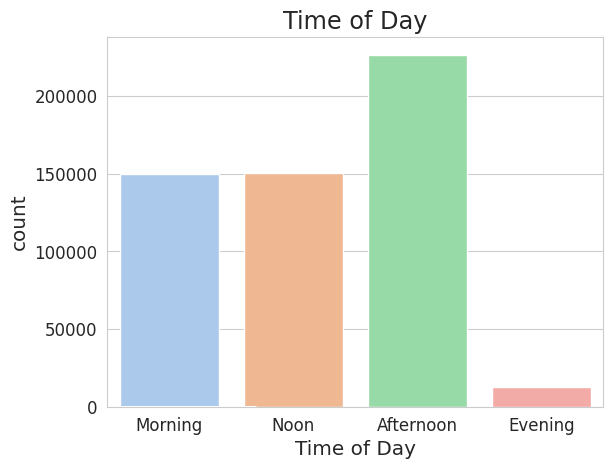

In [34]:
sns.set_style("whitegrid")

# Create a countplot
sns.countplot(data=df, x='Time of Day', palette="pastel")

# Create a circle for the center of the pie chart
circle = plt.Circle((0, 0), 0.7, color='white')

# Add the circle to the plot
plt.gca().add_artist(circle)

# Add a title
plt.title("Time of Day")

# Display the plot
plt.show()

# Time of Day Distribution

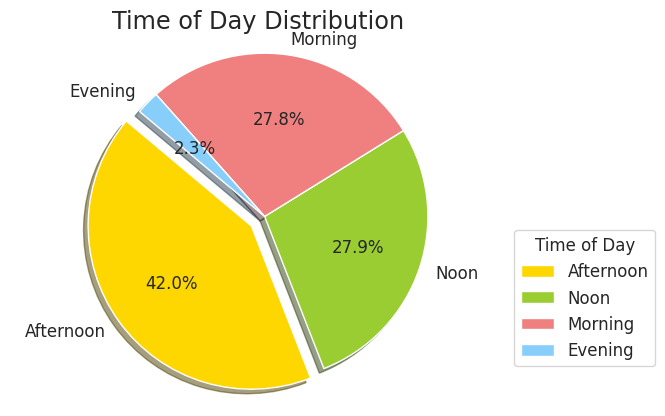

In [35]:
counts = df['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

# Highest Invoice Number for Customer ID

In [36]:
customer_invoice_quantity = df.groupby('CustomerID').agg({'InvoiceNo': 'max', 'Quantity': 'sum'})

# Find the row with the highest invoice quantity
highest_invoice_customer = customer_invoice_quantity[customer_invoice_quantity['Quantity'] == customer_invoice_quantity['Quantity'].max()]

# Extract the invoice number and quantity for the highest invoice customer
highest_invoice_no = highest_invoice_customer['InvoiceNo'].values[0]
highest_invoice_quantity = highest_invoice_customer['Quantity'].values[0]

print("Highest Invoice Number for Customer ID:", highest_invoice_no)
print("Total Quantity in Highest Invoice for Customer ID:", highest_invoice_quantity)

Highest Invoice Number for Customer ID: C580605
Total Quantity in Highest Invoice for Customer ID: 418230


In [37]:
highest_invoice_customer

,InvoiceNo,Quantity
CustomerID,,
15287,C580605,418230


# Customer ID with Maximum Transactions

In [38]:
invoice_counts = df['InvoiceNo'].value_counts()

# Find the invoice number with the highest count
max_invoice_no = invoice_counts.idxmax()

# Filter the DataFrame to get the rows with the maximum invoice number
max_invoice_customer = df[df['InvoiceNo'] == max_invoice_no]

# Extract the customer ID with the maximum invoice number
max_customer_id = max_invoice_customer['CustomerID'].values[0]

print("Customer ID with Maximum Transactions:", max_customer_id)

Customer ID with Maximum Transactions: 15287


In [39]:
max_invoice_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,Time of Day
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,2011-10-31 14:41:00,2.07,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,2011-10-31 14:41:00,0.83,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
431348,573585,DOT,DOTCOM POSTAGE,1,2011-10-31 14:41:00,2019.05,15287,United Kingdom,Bought,2011-10-31,14,Afternoon
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,15287,United Kingdom,Bought,2011-10-31,14,Afternoon


# Time of Day Distribution for Customer ID with Maximum Transactions

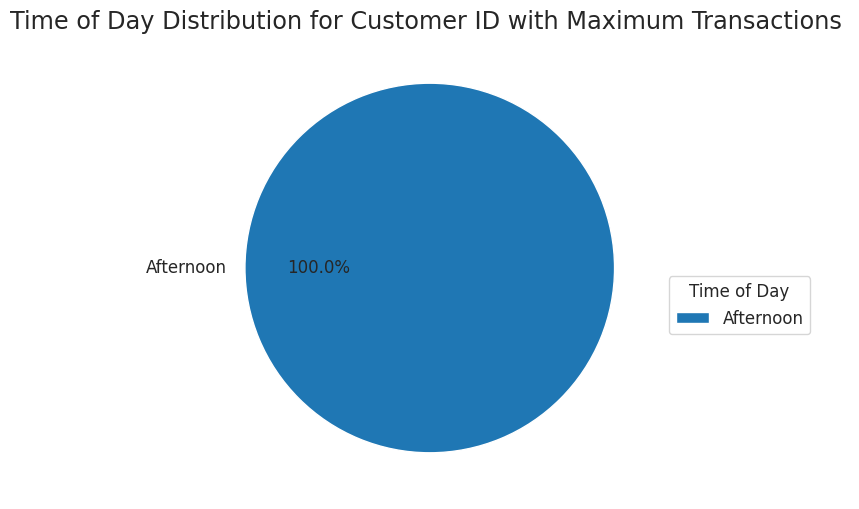

In [40]:
counts = max_invoice_customer['Time of Day'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Set the title and legend
plt.title('Time of Day Distribution for Customer ID with Maximum Transactions ')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()







In [41]:
max_invoice_customer['Transaction'].unique()

array(['Bought'], dtype=object)

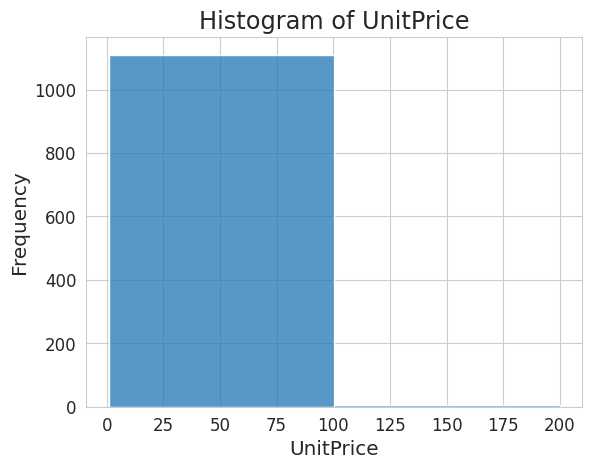

In [42]:
quantity_data = max_invoice_customer['Quantity']

# Create a histogram using Seaborn
sns.histplot(quantity_data, bins=2)  # You can specify the number of bins using the 'bins' parameter

# Set labels and title
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Histogram of UnitPrice')

# Show the plot
plt.show()

In [43]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group the data by country and month and year components of 'InvoiceDate'
transactions_per_month = df.groupby(['Country', df['InvoiceDate'].dt.strftime('%m-%Y')]).size().reset_index(name='Transaction Count')

In [44]:
transactions_per_month

,Country,InvoiceDate,Transaction Count
0,Australia,01-2011,127
1,Australia,02-2011,91
2,Australia,03-2011,110
3,Australia,04-2011,20
4,Australia,05-2011,117
...,...,...,...
309,Unspecified,06-2011,9
310,Unspecified,07-2011,221
311,Unspecified,08-2011,23
312,Unspecified,09-2011,66


# Distribution of Transactions by Country

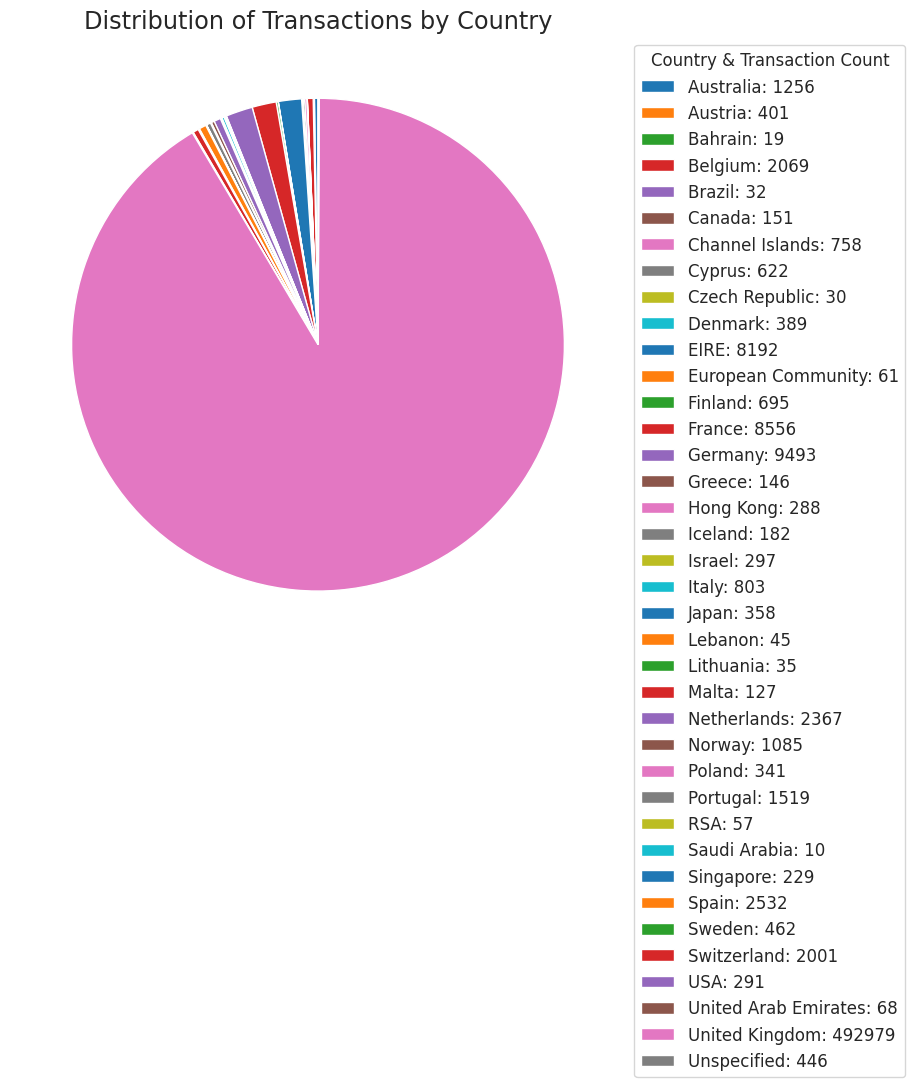

In [45]:
total_transactions_by_country = transactions_per_month.groupby('Country')['Transaction Count'].sum()

# Create a pie chart using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))  # Set the size of the pie chart
ax.pie(total_transactions_by_country, labels=None, autopct=None, startangle=90)  # Remove labels and autopct
ax.set_title('Distribution of Transactions by Country')

# Create a legend with country names and total transaction count
legend_labels = [f"{country}: {count}" for country, count in zip(total_transactions_by_country.index, total_transactions_by_country.values)]
ax.legend(legend_labels, title='Country & Transaction Count', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

# Distribution of Transactions by Country (Treemap)

In [46]:
# Group the data by 'Country' and calculate the total transaction count
total_transactions_by_country = transactions_per_month.groupby('Country')['Transaction Count'].sum().reset_index()

# Sort the total transaction counts in descending order
total_transactions_by_country = total_transactions_by_country.sort_values('Transaction Count', ascending=False)

# Create a treemap using Plotly Express
fig = px.treemap(total_transactions_by_country,
                 path=['Country'],
                 values='Transaction Count',
                 color='Country',  # Use 'Country' as the color variable
                 color_discrete_sequence=px.colors.qualitative.Prism,  # Specify the discrete color sequence
                 title='Distribution of Transactions by Country (Treemap)',
                 )

# Show the plot
fig.show()

In [47]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,8,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,8,Morning


# Top 10 Product Descriptions

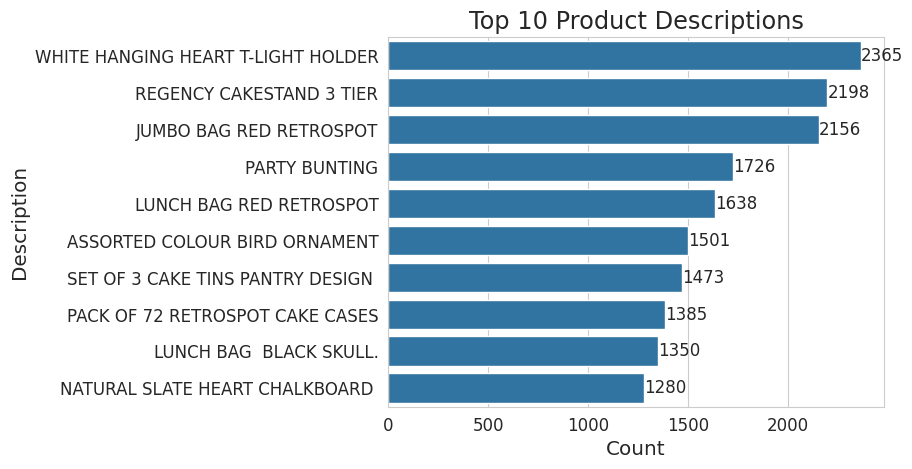

In [49]:
top_10_descriptions = df['Description'].value_counts().nlargest(10)

# Create a bar chart using Seaborn
sns.barplot(x=top_10_descriptions.values, y=top_10_descriptions.index)

plt.xlabel('Count')
plt.ylabel('Description')

plt.title('Top 10 Product Descriptions')

# Add annotations for the counts on the bars
for i, count in enumerate(top_10_descriptions.values):
    plt.text(count + 1, i, str(count), ha='left', va='center')

plt.show()

# Top 10 Product Descriptions by Country

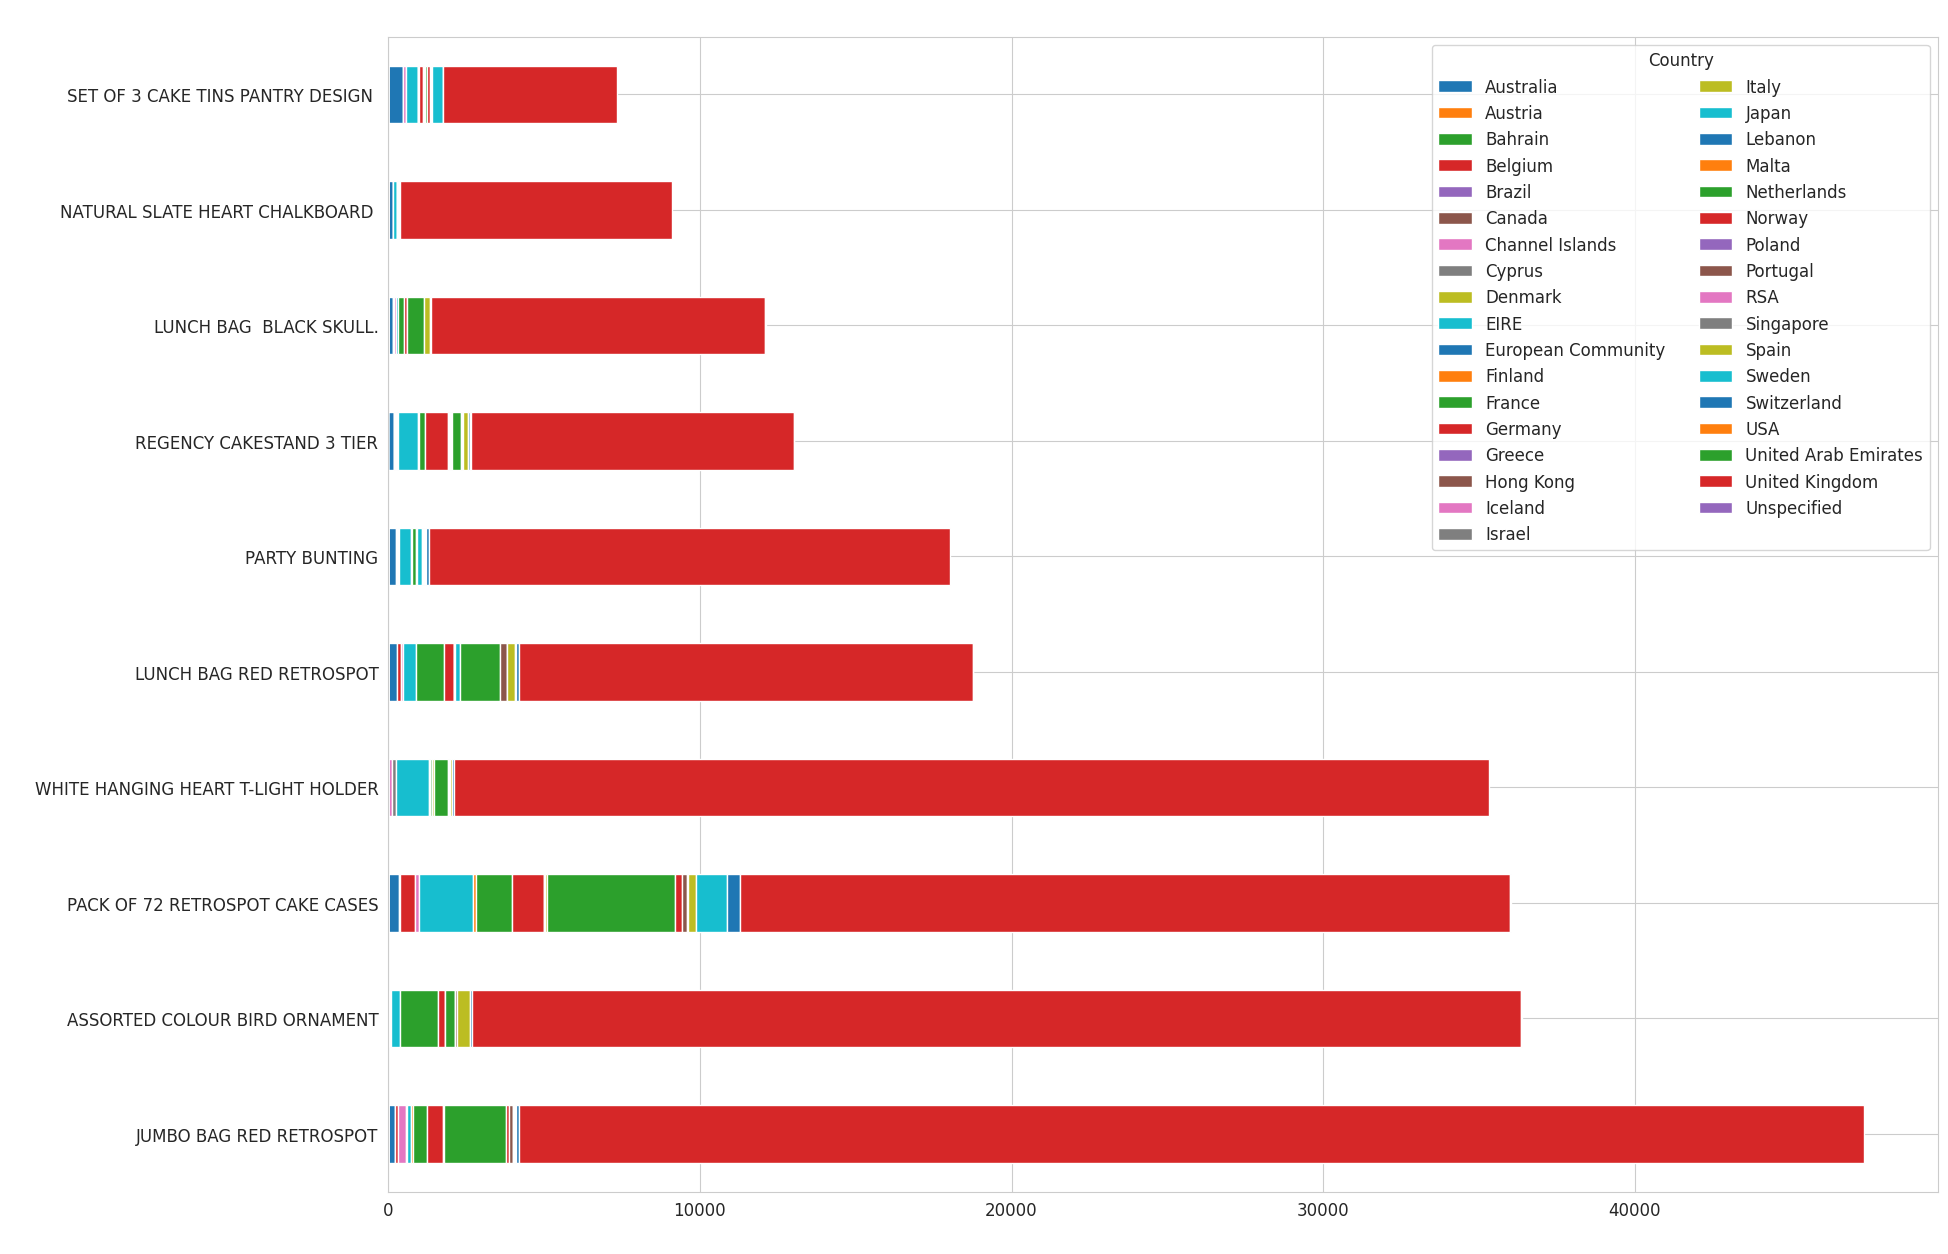

In [50]:
top_10_descriptions = df['Description'].value_counts().nlargest(10)

# Filter the DataFrame for the top 10 descriptions
df_top_10 = df[df['Description'].isin(top_10_descriptions.index)]


# Group by Description and Country, and sum the Quantity
grouped = df_top_10.groupby(['Description', 'Country'], as_index=False)['Quantity'].sum()

# Pivot the data to get Description as rows and Country as columns
pivot = grouped.pivot(index='Description', columns='Country', values='Quantity')

# Sort the rows by the total Quantity across all countries
pivot['Total'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Create a stacked horizontal bar chart with a larger size
fig, ax = plt.subplots(figsize=(20, 15))  # Increase figsize for larger chart
pivot.plot(kind='barh', stacked=True, ax=ax)

plt.xlabel('Quantity', color='white')  # Set font color to white
plt.ylabel('Description', color='white')  # Set font color to white
plt.title('Top 10 Product Descriptions by Country', color='white')  # Set font color to white

# Set background color to black

ax.legend(title='Country', ncol=2)  # Set legend colors

plt.show()